<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!kaggle datasets download -d aadeshkoirala/mnist-784

Dataset URL: https://www.kaggle.com/datasets/aadeshkoirala/mnist-784
License(s): unknown
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 163MB/s]


In [ ]:
!unzip /content/mnist-784.zip

Archive:  /content/mnist-784.zip
  inflating: mnist_784.csv           


In [ ]:
mnist = pd.read_csv("/content/mnist_784.csv")

In [ ]:
mnist.shape

(70000, 785)

In [ ]:
X,y= mnist.drop(['class'], axis=1), mnist['class']

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

#Visualization

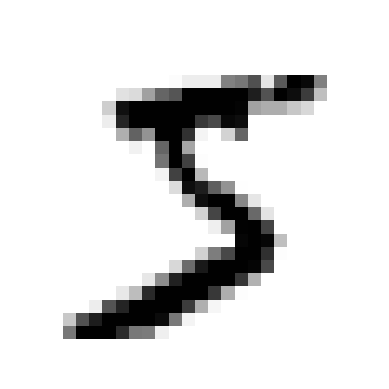

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(X):
  X=X.reshape(28,28)
  plt.imshow(X, cmap='binary')
  plt.axis('off')

plot_digit(X[0])

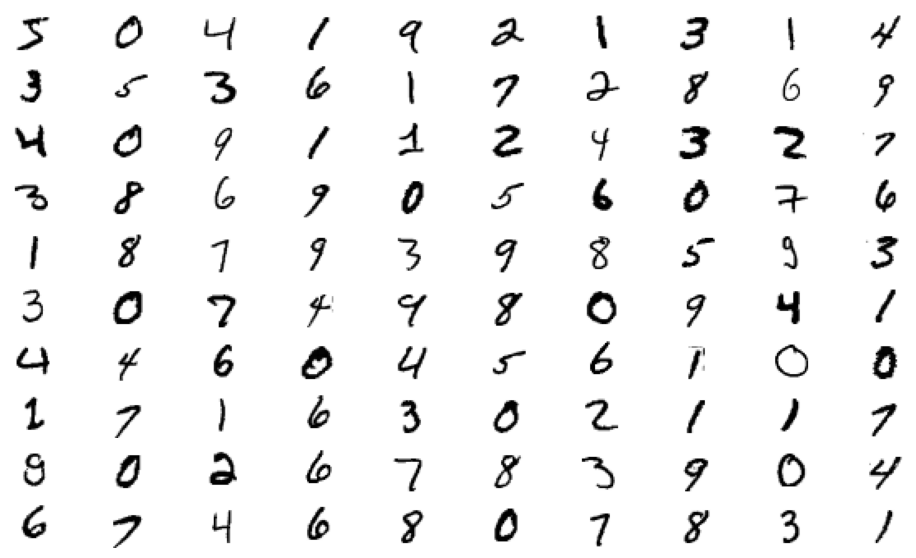

In [ ]:
plt.figure(figsize=(12,7))
for idx, image in enumerate(X[:100]):
  plt.subplot(10,10, idx+1)
  plot_digit(image)

In [ ]:
X_train= X[:60000]
X_test= X[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [ ]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_clf=SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.score(X_train, y_train_5)

0.9522666666666667

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3).mean()

0.9570333333333334

In [ ]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
dummy_clf.score(X_train, y_train_5)

0.90965

In [ ]:
len(X_train), sum(y_train_5)

(60000, 5421)

In [ ]:
pd.DataFrame(y_train_5).value_counts()

,count
0,
False,54579
True,5421


In [ ]:
len(y_train_5)/len(X_train)

1.0

In [ ]:
cross_val_score(dummy_clf, X_train,y_train_5, cv=3, scoring='f1')

array([0., 0., 0.])

In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
preds

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

#Part 2

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
y_scores=sgd_clf.decision_function([X[0]])
y_scores

array([2164.22030239])

In [ ]:
treshold = 3000
y_some_digit_pred=(y_scores>treshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

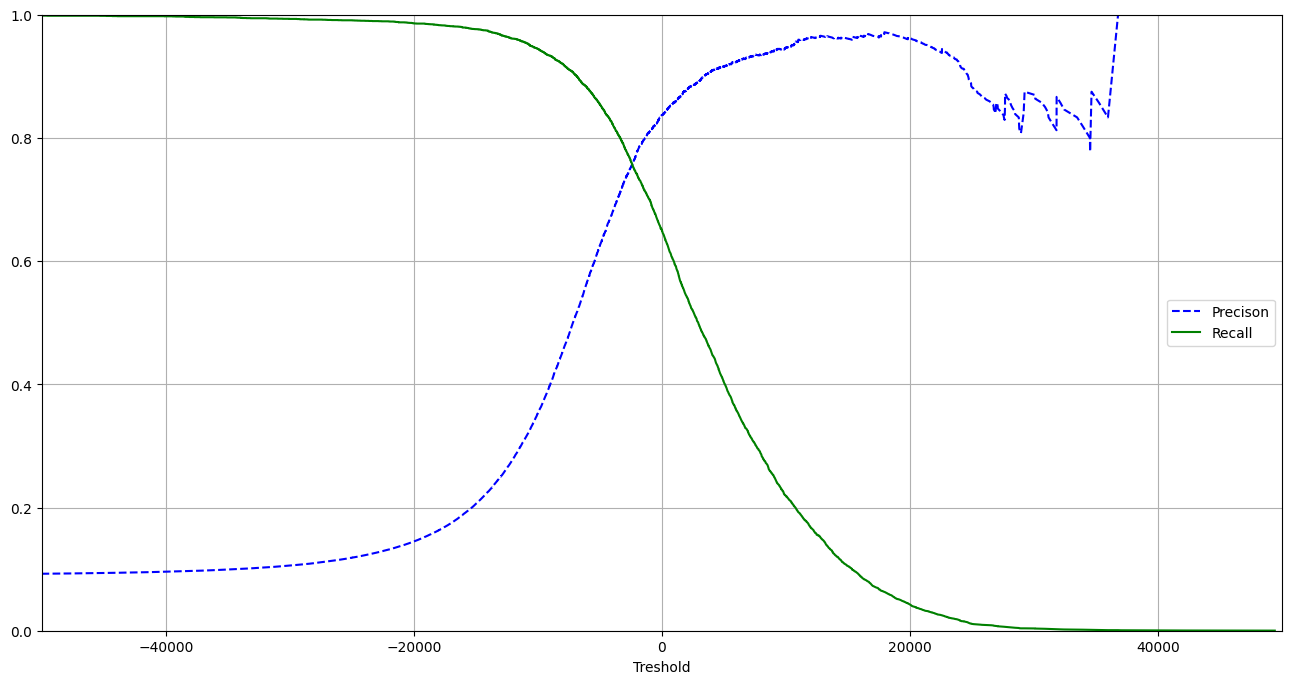

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tresholds, precisions[:-1], 'b--', label='Precison')
plt.plot(tresholds, recalls[:-1], 'g-', label='Recall')

plt.axis([-50000, 50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc='center right');

In [ ]:
idx_for_90_precision=(precisions>0.90).argmax()
treshold_for_90_precision=tresholds[idx_for_90_precision]

In [ ]:
idx_for_equal_precision=(precisions==recalls).argmax()
treshold_for_equals=tresholds[idx_for_equal_precision]
treshold_for_equals

-2379.064500932274

In [ ]:
precisions[idx_for_equal_precision], recalls[idx_for_equal_precision]

(0.7572403615569083, 0.7572403615569083)

In [ ]:
y_train_pred_90=(y_scores>=treshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precison=recall_score(y_train_5, y_train_pred_90)
recall_at_90_precison

0.4799852425751706

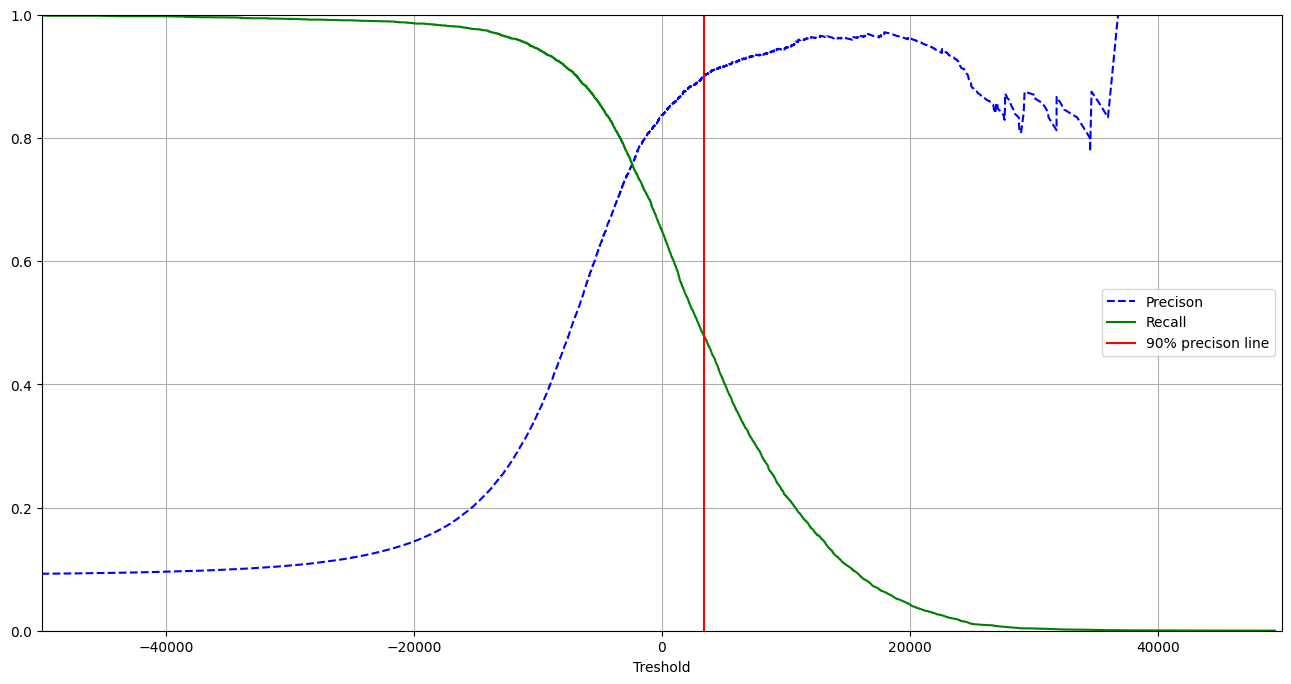

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tresholds, precisions[:-1], 'b--', label='Precison')
plt.plot(tresholds, recalls[:-1], 'g-', label='Recall')

plt.axis([-50000, 50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x=treshold_for_90_precision, ymin=0, ymax=1, color='r', label='90% precison line')
plt.legend(loc='center right');

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds= roc_curve(y_train_5, y_scores)

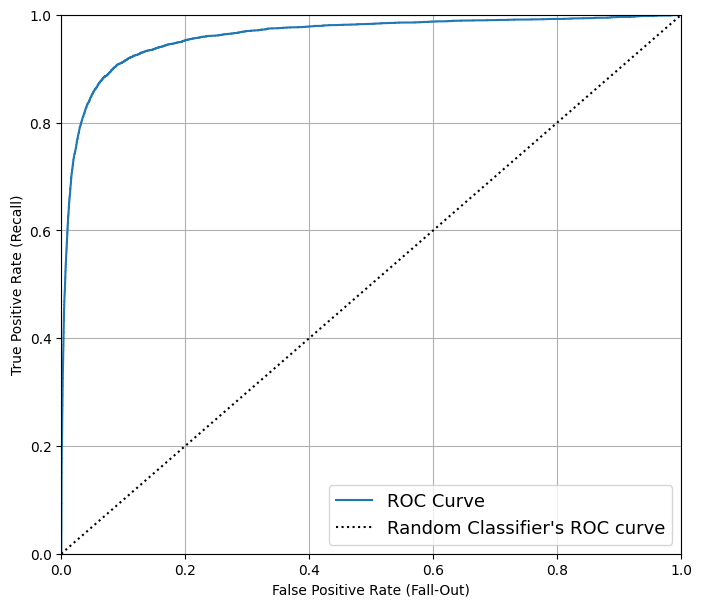

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k:', label="Random Classifier's ROC curve")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc='lower right', fontsize=13)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest =cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest, recalls_forest, tresholds_forest=precision_recall_curve(
    y_train_5, y_scores_forest
)

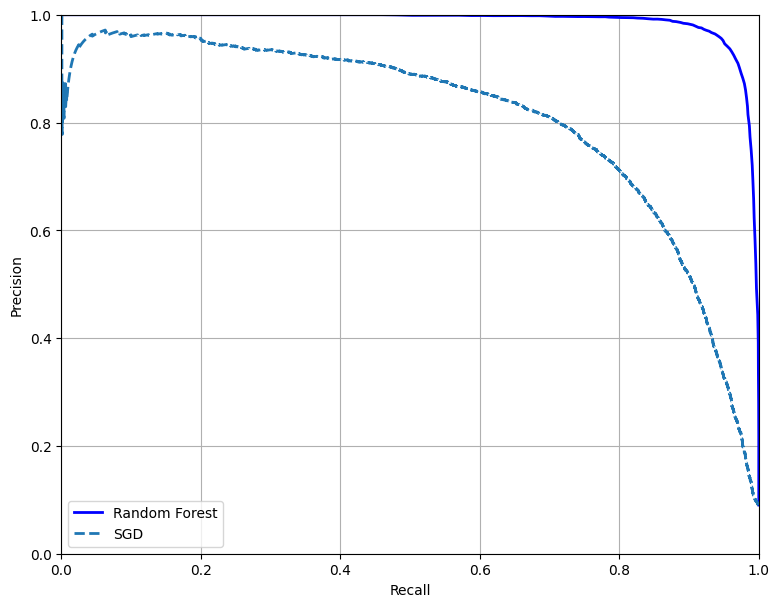

In [ ]:
plt.figure(figsize=(9,7))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,label='Random Forest')

plt.plot(recalls, precisions, '--', linewidth=2,label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower left')

In [ ]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402